<h1>1 - Aims, objectives and background</h1>

<h2>1.1 Introduction</h2>

In this project, we aim to perform an exploratory data analysis on cryptocurrency data sourced from CoinMarketCap. Our primary objectives include gaining insights into cryptocurrency price trends, analyzing market depth, volume, and examining the sentiment derived from news articles scraped from the CoinDesk webpage. This introduction will assess how the criteria provided have been met throughout the project.

<h2>1.2 Aims and Objectives, Dataset Acquisition, and Utilization</h2>

Our aims and objectives for this independent research project include understanding the relationship between cryptocurrency prices and market depth, analyzing trading volumes to identify patterns and trends, and examining the sentiment expressed in news articles to gauge its impact on cryptocurrency markets. We have obtained a relevant dataset by scraping cryptocurrency price, market depth, and volume data from CoinMarketCap, as well as news articles from CoinDesk.

Using Jupyter Notebook, we have utilized the acquired dataset to perform an exploratory data analysis. This involved cleaning the data, organizing it into appropriate data structures such as dataframes, and conducting statistical analyses to extract meaningful insights. By leveraging the powerful tools available in Jupyter Notebook, we have effectively explored and visualized the data to gain a deeper understanding of the cryptocurrency market dynamics.

<h2>1.3 Relevance of Data and Data Source Justification</h2>

The chosen data source, CoinMarketCap, is widely recognized as one of the leading cryptocurrency exchanges. Its extensive historical data provides a comprehensive view of cryptocurrency prices, market depth, and volume. This data source is highly relevant to our research question as it allows us to analyze the specific dynamics of Bitcoin (BTC) on the CoinMarketCap exchange. Furthermore, scraping news articles from CoinDesk adds valuable sentiment analysis, enabling us to gauge the market sentiment and its potential influence on cryptocurrency price movements.

We have justified the choice of this data source based on its reliability, relevance, and availability. The column headings in the dataset directly align with our research questions, allowing us to investigate correlations between price fluctuations, market depth, and trading volumes. Additionally, the data format, in the form of CSV files, is suitable for analysis and has been transformed into structured dataframes, facilitating various statistical analyses and visualizations.

In considering alternative datasets, we have explored the possibility of incorporating data from other cryptocurrency exchanges or additional news sources. However, CoinMarketCap was chosen as the primary data source due to its market prominence, historical data availability, and comprehensive nature. While other datasets may offer unique perspectives or alternative market dynamics, they may lack the breadth and depth provided by CoinMarketCap.

<h2>1.4 Project Background</h2>

The field of cryptocurrency is of great interest and relevance due to its rapidly evolving nature and potential impact on the financial landscape. This project focuses on analyzing Bitcoin (BTC) price trends, market depth, and trading volumes on the CoinMarketCap exchange, complemented by sentiment analysis of news articles from CoinDesk. Although there have been previous studies on cryptocurrency analysis, our research questions and specific focus have not been extensively explored.

The scope of our work includes analyzing price fluctuations, market depth, and trading volumes of BTC on CoinMarketCap. We will also examine the sentiment expressed in news articles to gain insights into the impact of news on cryptocurrency markets. Our analytical data processing pipeline involves data acquisition, data cleaning, exploratory data analysis, statistical analysis, and visualization techniques to derive meaningful insights.

To evaluate our aims and objectives, we will utilize various statistical measures and visualizations. These include stock graphs to visualize price trends and patterns, sentiment bars to assess the overall sentiment expressed in news articles, word clouds to highlight frequently occurring words, and graphs depicting the frequency of most repeated words in the


<h2>1.5 Ethics of Use of Data</h2>

The project demonstrates a strong commitment to ethical data use throughout the analysis. The data utilized in this project was obtained from reputable sources, CoinMarketCap and CoinDesk, with their explicit written permission. This ensures that the data collection process is conducted in a responsible manner, respecting the terms of service and usage restrictions set by these sources. By obtaining written permission, the project adheres to ethical guidelines and emphasizes the importance of obtaining proper consent and authorization for data usage.

To maintain transparency, the data processing pipeline has been thoroughly documented at each step of the analysis. By providing clear documentation, the project promotes accountability and allows for a better understanding of how the data was handled and processed. This transparency also enables other researchers to replicate or validate the analysis, contributing to the overall integrity of the project. Additionally, to protect individual privacy, any personally identifiable information within the dataset has been anonymized. This anonymization process ensures that the privacy and confidentiality of individuals involved in the data are safeguarded.

In regards to the potential biases within the dataset, we have to recognise that the project will be subject to Personal Biases from the authors of the articles taken from CoinDesk. Sometimes articles might be misleading to incite trader activity in the market which could influence someone into making a trade using this analysed data and potentially causing financial loss.

<h2>Module Loading</h2>

Checks if module dependencies have been met, if not, automatically fixes them ---> WARNING: KERNEL WILL BE RESTARTED

In [1]:
import time
import os
modulesRequired = [('requests'    ,'2.27.1' ),
                   ('scipy'       ,'1.10.1' ),
                   ('numpy'       ,'1.24.3' ),
                   ('nltk'        ,'3.7'    ),
                   ('matplotlib'  ,'3.2.1'  ),
                   ('selenium'    ,'3.141.0'),
                   ('wordcloud'   ,'1.9.2'  ),
                   ('re'          ,'2.2.1'  ),
                   ('pandas'      ,'1.4.2'  ),
                   ('func_timeout','4.3.5'  )]

# IMPORTER AND AUTO INSTALLER
for module in modulesRequired: 
    try: 
        locals()[module[0]] = __import__(module[0])
        print(f'Imported {module[0]}')
    except: 
        ! pip install {module[0]}
        locals()[module[0]] = __import__(module[0])
        print(f'Imported {module[0]}')

# WARNING SYSTEM
modules = [requests,scipy,numpy,nltk,matplotlib,selenium,wordcloud,re,pandas]
status = False
for x in range(len(modules)):
    if modules[x].__version__ != modulesRequired[x][1]:
        print('\nWARNING:', modulesRequired[x][0]+' VERSION MISMATCH\n')
        print('You need:' , modulesRequired[x][1])
        print('You have:' , modules[x].__version__)
        status = True

# AUTO FIXER         
if status == False: print('\nModule dependencies met perfectly!')
else: 
    print('\nFixing dependencies as code might not run properly!')
    print('\nEnsure Microsoft Visual C++ is installed!')
    
    for x in range(len(modules)):
        if modules[x].__version__ !=  modulesRequired[x][1]:
            print(f'\nINSTALLING --> {modulesRequired[x][0]} == {modulesRequired[x][1]}')
            ! pip install {modulesRequired[x][0]}=={modulesRequired[x][1]}
    
    print('\nRESTARTING KERNEL TO UPDATE CHANGES, RERUN AGAIN!')
    
    time.sleep(2)
    os._exit( 00) # <--- RESTARTS KERNEL! 

Imported requests
Imported scipy
Imported numpy
Imported nltk
Imported matplotlib
Imported selenium
Imported wordcloud
Imported re
Imported pandas
Imported func_timeout

Module dependencies met perfectly!


In [2]:
# Import rest of libraries and modules
from time import sleep
from datetime import datetime
from IPython.display import clear_output
from selenium import webdriver
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon') 
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from wordcloud import WordCloud
import math
from random import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cbook   
import warnings
from func_timeout import func_timeout, FunctionTimedOut

# Creates current path string
dirPath = os.getcwd()

# Sets headers for selenium
headers = {
    "user-agent":"Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/61.0.3163.100 Safari/537.36"
}

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
for module in modules: print(module.__name__+' ==',module.__version__)

requests == 2.27.1
scipy == 1.10.1
numpy == 1.24.3
nltk == 3.7
matplotlib == 3.2.1
selenium == 3.141.0
wordcloud == 1.9.2
re == 2.2.1
pandas == 1.4.2


<h1>2 - Data Scrapping and Processing</h1> 

<h2>2.1 Sourcing Exchange Data From CoinMarketCap</h2>

<h3>2.1.1 CoinMarketCap Scraper</h3>

This code allows us to get all TR tags from all exchanges which have BTC/USDT data. It navigates the page using Selenium. The scraper is made as an object to allow access to the Selenium object created which permits controling it outside of the object, and due this it will be possible to close the browser by a method call, this will be necessary later on and it will be explained why.

In [4]:
class scraper:
    
    # Create the programmable browser
    def __init__(self):
        self.browser = webdriver.Chrome(executable_path= dirPath + "\selenium.exe")
    
    def sourceData(self):
        # Set and load the page
        self.browser.set_window_size(1200,600);
        url = "https://coinmarketcap.com/currencies/bitcoin/markets/"
        #print("Loading", url)
        self.browser.get(url)
        time.sleep(1)

        # Scroll down the height of the page
        self.browser.execute_script("window.scrollTo(0,document.body.scrollHeight)")
        time.sleep(2)
        
        # Forces market page and presses dropdown menu
        markets  =  "document.getElementsByClassName('sc-44910c32-0 bnFkDL sc-240dc94d-0 jZkcnS cmc-link')[0].click()"
        self.browser.execute_script(markets)
        self.browser.execute_script("document.getElementsByClassName('sc-aef7b723-0 sc-a4d63dad-0 ddLpEy')[0].click()")
        
        # Finds the USDT button and presses it
        pairs = self.browser.find_elements_by_class_name("sc-44910c32-0.kppgZc.dropdown-item")

        USDT = [x for x in range(len(pairs)) if pairs[x].get_attribute("innerHTML") == 'USDT'][0]
                
        self.browser.execute_script(f"document.getElementsByClassName('sc-44910c32-0 kppgZc dropdown-item')[{USDT}].click()")
        time.sleep(2)

        # Looks for the TABLE tag
        tableTags = self.browser.find_elements(By.TAG_NAME, "table")
        
        # Parses Table Tag with BS4
        parsedTableTags = BeautifulSoup(str(tableTags[0].get_attribute("innerHTML")), "html.parser")
       
        # Looks for TR tags
        trTags = parsedTableTags.find_all('tr')

        # Looks which TR tags have BTC/USDT to avoid XBT being incorporated
        tagHasBTC = [x for x in range(len(trTags)) if trTags[x].find_all(string="BTC/USDT") == ['BTC/USDT']]
      
        # Appends all TR tags which has BTCUSDT
        btcExchangeData = [trTags[tagHasBTC[x]] for x in range(len(tagHasBTC))]
        
        # time.sleep(45) # OPTIONAL TIMEOUT
        self.browser.quit()
        
        return btcExchangeData
        
    def closeBrowser(self):
        self.browser.quit()

<h3>2.1.2 Creating Exchange Dataframes</h3>

Each exchange data capture which encompases top 10 exchanges like Binance, Okx and so on, with their respective prices, market depth value at ±2% and volume traded in the last 24 hours, is put into exchangeData dataframe which is then put into datedExchangeData dataframe with a timestamp associated, all of this is acomplished using exchangeDataManager() function. This in fact is a nested dataframe and this is necessary as it will allow easy data use, visualisation and exporting.

In [5]:
def createExchangeDataFrame():
    exchangeDataTable = {
        'EXCHANGE': [], 
           'PRICE': [],
         '+2 SELL': [],
          '-2 BUY': [],
          'VOLUME': [],
    }
    return pd.DataFrame(exchangeDataTable)

In [6]:
createExchangeDataFrame()

,EXCHANGE,PRICE,+2 SELL,-2 BUY,VOLUME


In [7]:
datedExchangeDataTable = {   
        'EXCHANGE DATA': [],    
    'TOTAL DEPTH RATIO': [],    
                 'DATE': []    
}
datedExchangeData = pd.DataFrame(datedExchangeDataTable)
datedExchangeData

,EXCHANGE DATA,TOTAL DEPTH RATIO,DATE


<h3>2.1.3 dataFrame loader from CSV</h3>
    
Reimporting the exported dataFrame proved to lose all of its formating rendering the dataFrames inside it as just strings, which then made all other code not work.

I had no other choice than to improvise by coding a formatting tool. All it does is it just removes unnecesary parts from the dataFrame string and tokenises it, formats and inserts it into a new dataFrame entry, it does this for all entries, then it just deletes the corrupted ones and resets the indices.

In [8]:
datedExchangeData = pd.read_csv('datedExchangeData.csv')

In [9]:
datedExchangeData.iloc[0][0]

'   EXCHANGE  PRICE   +2 SELL    -2 BUY      VOLUME\n0   BINANCE  30632  27754322  18599986  1341350586\n1       OKX  30627  30608122  35281479   294749207\n2      GATE  30633  16206311  13400061   223229203\n3    KUCOIN  30630  21240676  20404817   138136801\n4  COINBASE  30632   1273125   2075955    82344033\n5  BITFINEX  30634   8871402   5138577    15203968\n6  BITSTAMP  30635    411603    293089      787757\n7   BITTREX  30628    540212    210688      351334\n8    GEMINI  30689     22319     22177       26227'

In [10]:
def fixData(datedExchangeData, offset):
    
    for x in range(offset):

        # Removes unnecessary string parts
        toParse = datedExchangeData.iloc[x][0]

        redundantCharacters = ['EXCHANGE','PRICE','+2 SELL','-2 BUY','VOLUME\n0', 
                                '\n1','\n2','\n3','\n4','\n5','\n6','\n7','\n8']

        for character in redundantCharacters: toParse = toParse.replace(character, '') 

        # Tokenises the string
        toParse = nltk.word_tokenize(toParse)

        # Creates new entry and inserts a new exchangeData dataFrame 
        datedExchangeData.loc[x + offset] = ''
        datedExchangeData.loc[x + offset][0] = createExchangeDataFrame()

        # Splits array into equal parts of lenght 5, and loops for each exchage's data row
        # example: BINANCE  30186  24513908  17229170  1191950547, as you see has length 5
        split = np.array_split(toParse, 9)
        for y in range(9):

            # Formats numbers from string into integers 
            rawList   = [item for item in split[y]] 
            numberFix = [int(number) for number in rawList[1:]]

            # Merges the name, numbers into a single list and appends into dataFrame
            fixedList = [rawList[0]]
            for number in numberFix: fixedList.append(number)

            datedExchangeData.iloc[x + offset][0].loc[y] = fixedList

        # Formats date values and appends them into dataFrame    
        datedExchangeData.iloc[x + offset][2] = datetime.strptime(datedExchangeData.iloc[x][2], '%Y-%m-%d %H:%M:%S.%f')

    # Removes corrupted entries as it been fixed with new ones
    for x in range(offset): datedExchangeData = datedExchangeData.drop(x)
    # Resets index     
    datedExchangeData = datedExchangeData.reset_index(drop=True)
    
    return datedExchangeData

In [11]:
datedExchangeData  = fixData(datedExchangeData, len(datedExchangeData))

backupExchangeData = datedExchangeData.copy()

datedExchangeData.iloc[0][0].T

,0,1,2,3,4,5,6,7,8
EXCHANGE,BINANCE,OKX,GATE,KUCOIN,COINBASE,BITFINEX,BITSTAMP,BITTREX,GEMINI
PRICE,30632,30627,30633,30630,30632,30634,30635,30628,30689
+2 SELL,27754322,30608122,16206311,21240676,1273125,8871402,411603,540212,22319
-2 BUY,18599986,35281479,13400061,20404817,2075955,5138577,293089,210688,22177
VOLUME,1341350586,294749207,223229203,138136801,82344033,15203968,787757,351334,26227


In [12]:
datedExchangeData.T

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
EXCHANGE DATA,EXCHANGE PRICE +2 SELL -2 BUY VO...,EXCHANGE PRICE +2 SELL -2 BUY VO...,EXCHANGE PRICE +2 SELL -2 BUY VO...,EXCHANGE PRICE +2 SELL -2 BUY VO...,EXCHANGE PRICE +2 SELL -2 BUY VO...,EXCHANGE PRICE +2 SELL -2 BUY VO...,EXCHANGE PRICE +2 SELL -2 BUY VO...,EXCHANGE PRICE +2 SELL -2 BUY VO...,EXCHANGE PRICE +2 SELL -2 BUY VO...,EXCHANGE PRICE +2 SELL -2 BUY VO...,...,EXCHANGE PRICE +2 SELL -2 BUY VOL...,EXCHANGE PRICE +2 SELL -2 BUY VOL...,EXCHANGE PRICE +2 SELL -2 BUY VOL...,EXCHANGE PRICE +2 SELL -2 BUY VOL...,EXCHANGE PRICE +2 SELL -2 BUY VOL...,EXCHANGE PRICE +2 SELL -2 BUY VOL...,EXCHANGE PRICE +2 SELL -2 BUY VOL...,EXCHANGE PRICE +2 SELL -2 BUY VOL...,EXCHANGE PRICE +2 SELL -2 BUY VOL...,EXCHANGE PRICE +2 SELL -2 BUY VOL...
TOTAL DEPTH RATIO,,,,,,,,,,,...,,,,,,,,,,
DATE,2023-07-11 18:24:33.473937,2023-07-11 18:25:30.788946,2023-07-11 18:26:28.701291,2023-07-11 18:27:25.372355,2023-07-11 18:32:24.854533,2023-07-11 18:33:21.616423,2023-07-11 18:34:19.304262,2023-07-11 18:39:26.264376,2023-07-11 18:40:23.546823,2023-07-11 18:41:20.674323,...,2023-07-11 23:51:51.868003,2023-07-11 23:52:50.170870,2023-07-11 23:57:56.589951,2023-07-11 23:58:54.978144,2023-07-11 23:59:53.591654,2023-07-12 00:00:51.931832,2023-07-12 00:01:50.155853,2023-07-12 00:02:48.306214,2023-07-12 00:03:46.418366,2023-07-12 00:04:44.450811


<h3>2.1.4 Appending Data With Data Manager</h3>

The data manager has two parameters, the data received from the scrapper and the current count of dataFrames appended to datedExchangeData(), this is to avoid losing data from accidental overwrite or index gaps.

Regex is used to properly format data before inserting into DataFrame. All number strings are coverted into Floats for later arithmetical use when calculating average prices and other required data for analysis, and the name of the exchange is extracted from the URL through a creative data processing.

In [13]:
def exchangeDataManager(btcExchangeData, dataCounter):
    
    # Initialises exchangeData dataFrame
    exchangeData = createExchangeDataFrame()
    
    # Iterates through each exchange, like Binance, Okx and so on
    for x in range(0,9):
        #######################################################################################
        # GETS NAME OF THE EXCHANGE BY SLICING THE URL:
        
        # Gets attributes from TD tag containing the exchange's link
        exLink = btcExchangeData[x].find_all('td')[2].find('a').attrs
        
        # Looks for the end index inside the href link domain extension end start
        endIndex = re.search('.com|.net|.io' , exLink['href'][12:]).span()[0]   
        
        # Reverses string and looks for the start index of the domain name inside the href link
        startIndex = re.search('\/|\.' , exLink['href'][:12+endIndex][::-1]).span()[0]
               
        # Slices start and end of link but it's reversed
        reversedName = exLink['href'][:12+endIndex][::-1][:startIndex]
        #######################################################################################
        
        # Creates exchange data list and appends exchange name extracted from link
        rowData = [reversedName[::-1].upper()]

        # Price, market depth and volume data extraction and processing
        counter = 0
        for y in range(3,7):

            # Extracts number data from TD tag, and slices $ off and removes the commas    
            numberData = re.sub(r',', "", btcExchangeData[x].find_all('td')[y].find_all(string=re.compile(r'\$'))[0][1:])
            rowData.append(int(float(numberData)))

            counter = (counter + 1) % 5
        # Appends Exchange Name, Price, Market depth and volume for the respective exchange into the dataframe     
        exchangeData.loc[x]= rowData
    
    # Sorts exchangeData by volume, resets index and inserts 
    # exchangeData dataframe with its timestamp into datedExchangeData
    exchangeData = exchangeData.sort_values(by='VOLUME',ascending=False)
    exchangeData = exchangeData.reset_index(drop=True)
    datedExchangeData.loc[dataCounter] = ''
    datedExchangeData.loc[dataCounter][0] = exchangeData.sort_values(by='VOLUME',ascending=False)
    datedExchangeData.loc[dataCounter][2] = datetime.now()

<h3>2.1.5 Automation And Exception Handling</h3>

Sometimes CoinDesk's server refuses termporally to give https://coinmarketcap.com/currencies/bitcoin/markets/ and redirects to https://coinmarketcap.com/currencies/bitcoin/ which messes with the button click scripting as the page design is different between the two, this code forces to run recurisvely the data scrapper at the specified amount requested of entries to append, because it's recursive it will keep calling itself until the condition is met, otherwise we would need to be restarting manually and it just becomes a big inconvenience.

Because it throws an exception in this case, browser.quit() is not reached at sourceData() method, therefore we use closeBrowser() method to close it when the exception occurs, otherwise it will leave Selenium instances and crash the computer in the worst case scenario.

A way to avoid this is to use their API, which would been faster and easier, but I wanted to actually learn how to use Selenium instead as a way to simulate scrapping a page which doesn't have an API available.

In [14]:
def autoLoader(newEntriesNumber):

    def forceLoad():
        try: 
            while len(datedExchangeData) !=  targetEntries:
                instance = scraper()
                exchangeDataManager(instance.sourceData(),len(datedExchangeData))
        # Will call function recursively until number of entries is achieved
        except: 
            instance.closeBrowser()
            forceLoad()
      
    targetEntries = len(datedExchangeData) + newEntriesNumber
    forceLoad()

Incorporates autoLoader() inside a timeout function, specially made for UoL testing, otherwise it will run indefinitely if it's unable to load correctly the data due the page changing or some server issue and only way to stop it will be by forced kernel restart.

In [15]:
def run():
    autoLoader(1) # <------------------- Number value = entries to create
    print('SUCCESSFUL DATA SCRAPPING!')

try: func_timeout(120, run) # <--------- Number value = secs until timeout
    
except FunctionTimedOut: 
    print('TIMED OUT SCRAPPING DATA! Page might have changed.')
except:                  
    print('ERROR: Check connection to server or Selenium configuration.')
    
datedExchangeData[-2:]

SUCCESSFUL DATA SCRAPPING!


,EXCHANGE DATA,TOTAL DEPTH RATIO,DATE
299,EXCHANGE PRICE +2 SELL -2 BUY VOL...,,2023-07-12 00:04:44.450811
300,EXCHANGE PRICE +2 SELL -2 BUY VOL...,,2023-07-16 16:49:05.999416


To maintain the integrity of my analysis and ensure proper visualization of the results, it is needed to remove the additional entry created by the previous code. By using the original data which I analysed, we can avoid any disruptions or inconsistencies caused by the gap in data. This will help maintain accuracy and allow for a valid and meaningful visual interpretation of my analysis when reviewed later.

In [16]:
datedExchangeData = backupExchangeData.copy()
datedExchangeData[-2:]

,EXCHANGE DATA,TOTAL DEPTH RATIO,DATE
298,EXCHANGE PRICE +2 SELL -2 BUY VOL...,,2023-07-12 00:03:46.418366
299,EXCHANGE PRICE +2 SELL -2 BUY VOL...,,2023-07-12 00:04:44.450811


<h2>2.2 Market Depth Data Managers</h2>

The function calculateTotalDepthRatio() calculates market buy vs. sell pressure by adding up all buy orders vs the sell orders in the ±2% range of the current price. It returns buy orders and sell order amount converted into BTC and the ratio of them both. The ratio value will be used later on to see the changing buy vs. sell pressures over a period of time graphically.

In [17]:
def calculateTotalDepthRatio(datedExchangeDataIndex):
    
    # Imports specific exchangeData dataframe from datedExchangeData
    data = datedExchangeData.iloc[datedExchangeDataIndex][0]
    # Sums up all buy  orders quantity adjust for 2% off from the average and divides by the average price
    buy  = data[ '-2 BUY'].sum() * 0.98 / data['PRICE'].mean()
    # Sums up all sell orders quantity adjust for 2% more from the average and divides by the average price
    sell = data['+2 SELL'].sum() * 1.02 / data['PRICE'].mean()

    # Calculates ratio and appends it to the datedExchangeDataframe
    total = buy + sell
    ratio = buy / total
    datedExchangeData.iloc[datedExchangeDataIndex]['TOTAL DEPTH RATIO'] = ratio
    
    return int(buy),int(sell)

In [18]:
for x in range(len(datedExchangeData)): calculateTotalDepthRatio(x) 

datedExchangeData.T

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
EXCHANGE DATA,EXCHANGE PRICE +2 SELL -2 BUY VO...,EXCHANGE PRICE +2 SELL -2 BUY VO...,EXCHANGE PRICE +2 SELL -2 BUY VO...,EXCHANGE PRICE +2 SELL -2 BUY VO...,EXCHANGE PRICE +2 SELL -2 BUY VO...,EXCHANGE PRICE +2 SELL -2 BUY VO...,EXCHANGE PRICE +2 SELL -2 BUY VO...,EXCHANGE PRICE +2 SELL -2 BUY VO...,EXCHANGE PRICE +2 SELL -2 BUY VO...,EXCHANGE PRICE +2 SELL -2 BUY VO...,...,EXCHANGE PRICE +2 SELL -2 BUY VOL...,EXCHANGE PRICE +2 SELL -2 BUY VOL...,EXCHANGE PRICE +2 SELL -2 BUY VOL...,EXCHANGE PRICE +2 SELL -2 BUY VOL...,EXCHANGE PRICE +2 SELL -2 BUY VOL...,EXCHANGE PRICE +2 SELL -2 BUY VOL...,EXCHANGE PRICE +2 SELL -2 BUY VOL...,EXCHANGE PRICE +2 SELL -2 BUY VOL...,EXCHANGE PRICE +2 SELL -2 BUY VOL...,EXCHANGE PRICE +2 SELL -2 BUY VOL...
TOTAL DEPTH RATIO,0.461625,0.461625,0.461625,0.461625,0.491822,0.491822,0.491822,0.462566,0.462566,0.462566,...,0.50241,0.50241,0.49255,0.49255,0.49255,0.49255,0.49255,0.49255,0.460046,0.460046
DATE,2023-07-11 18:24:33.473937,2023-07-11 18:25:30.788946,2023-07-11 18:26:28.701291,2023-07-11 18:27:25.372355,2023-07-11 18:32:24.854533,2023-07-11 18:33:21.616423,2023-07-11 18:34:19.304262,2023-07-11 18:39:26.264376,2023-07-11 18:40:23.546823,2023-07-11 18:41:20.674323,...,2023-07-11 23:51:51.868003,2023-07-11 23:52:50.170870,2023-07-11 23:57:56.589951,2023-07-11 23:58:54.978144,2023-07-11 23:59:53.591654,2023-07-12 00:00:51.931832,2023-07-12 00:01:50.155853,2023-07-12 00:02:48.306214,2023-07-12 00:03:46.418366,2023-07-12 00:04:44.450811


The function multipleDepthDataManager() is very similar to calculateTotalDepthRatio() but the data returned here is to visualize each individual exchange buy vs sell pressure. It will allows us to visually compare how traders are behaving across different exchanges.

To streamline our analysis, we will focus exclusively on the top six exchanges in terms of traded volume. The traded volume on these exchanges significantly surpasses that of any additional exchanges, rendering the volumes of the latter negligible for consideration. By concentrating on the most influential exchanges, we can obtain a more accurate and meaningful representation of the market dynamics.

In [19]:
def multipleDepthDataManager(exchangeData):
    # Data lists to return
    label   = []
    ratio   = []
    buyBTC  = []
    sellBTC = []
    
    # For each exchange, 6 top exchanges by volume
    for x in range(0,6):
        
        # Appends name of exchange
        label.append(exchangeData[x][0])
        
        # Calculates buy and sell order size in BTC
        buyAmount  = int(exchangeData[x][3]/(exchangeData[x][1]*0.98))
        sellAmount = int(exchangeData[x][2]/(exchangeData[x][1]*1.02))
        
        # Calculates and appends ratio
        total = buyAmount + sellAmount        
        ratio.append(buyAmount/total)

        # Appends buy and sell amounts of BTC into list
        buyBTC.append(f'BUY {buyAmount} BTC')
        sellBTC.append(f'SELL {sellAmount} BTC')
        
    return [label, ratio, buyBTC, sellBTC]

In [20]:
multipleDepthDataManager(datedExchangeData.iloc[-1][0].iloc)

[['BINANCE', 'OKX', 'BYBIT', 'KUCOIN', 'COINBASE', 'BITFINEX'],
 [0.538235294117647,
  0.4396378269617706,
  0.5727650727650727,
  0.3970037453183521,
  0.6166666666666667,
  0.39036144578313253],
 ['BUY 915 BTC',
  'BUY 874 BTC',
  'BUY 551 BTC',
  'BUY 424 BTC',
  'BUY 74 BTC',
  'BUY 162 BTC'],
 ['SELL 785 BTC',
  'SELL 1114 BTC',
  'SELL 411 BTC',
  'SELL 644 BTC',
  'SELL 46 BTC',
  'SELL 253 BTC']]

<h2>2.3 Articles Sourcing And Processing</h2>

<h3>2.3.1 Articles DataFrame</h3>

Initialises the Articles Dataframe. Same as with the Exchange Data dataFrame, the dataFrame allows for easy access to important values which we will be working with and allows export into CSV for offline backups.

In [21]:
articleData = {
                   'Editor': [],
                      'URL': [], 
              'Raw article': [],
       'Lemmatised article': [],
          'Bull word count': [],     
          'Bear word count': [],     
          'Sentiment ratio': [],
    '8 most frequent words': [],
}
articles = pd.DataFrame(articleData)
articles

,Editor,URL,Raw article,Lemmatised article,Bull word count,Bear word count,Sentiment ratio,8 most frequent words


<h3>2.3.2 CoinDesk Link Sourcing Function</h3>

Creates article URL entries into Articles dataFrame using Selenium, later on, the content of each article will be extracted using sourceCoindeskArticle()

In [22]:
def sourceCoindeskLinks(x):  
    # Runs browser  
    url = "https://www.coindesk.com/tag/bitcoin/"+str(x)+"/"
    browser = webdriver.Chrome(executable_path= dirPath + "\selenium.exe")

    # Loads page
    print("Loading", url)
    browser.get(url)
    
    # Parses raw body content
    time.sleep(1)
    rawData = browser.find_elements(By.XPATH, '/html/body')
    parsedData = BeautifulSoup(str(rawData[0].get_attribute("innerHTML")),
                                                            "html.parser")
    browser.quit()

    # Creates entries and saves links into dataframe
    articleCount = len(articles)
    for x in range(0,10):
        entryIndex = x + articleCount
        articles.loc[entryIndex] = ''
        articles.loc[entryIndex][0] = 'COINDESK'
        
        subdirectory = parsedData.find_all('a',class_='card-title')[x]['href']
        articles.loc[entryIndex][1] = 'https://www.coindesk.com' + subdirectory

In [23]:
try:
    for x in range(1,3): sourceCoindeskLinks(x)
    articles.URL
except:
    print('ERROR: Check connection to server or Selenium configuration.')

Loading https://www.coindesk.com/tag/bitcoin/1/
Loading https://www.coindesk.com/tag/bitcoin/2/


<h3>2.3.3 Function To Source CoinDesk Articles</h3>

Inspecting article design in CoinDesk led to the obsevation that is always between two specific P tags, by targetting their class name, we get the indices, which then are used as a range limiter for the P tags which contain the articles text.

If the article is a podcast or a Spanish article, it will be removed automatically and the dataFrame updated.

In [24]:
def sourceCoindeskArticle(entryIndex, url):
    
    # Gets html data and parses it
    rawData = requests.get(url ,headers).text
    parsedData = BeautifulSoup(rawData, "html.parser")

    # Gets all P tags
    pTags =  parsedData.find_all('p')
    
    # Finds the tags which are going to act as limiters, and the article data is between the limiters
    upperLimit = parsedData.find(class_="hjHKEC")
    lowerLimit = parsedData.find(class_="bbBZOc")
    
    # CoinDesk always uses for articles the same structure, any deviation means that is a podcast or 
    # or a Spanish article which has no usefulness for our article
    if upperLimit == None or lowerLimit == None:
        
        print('Incompatible or missing page, dropping',url+'\n')
        return
    
    # Finds the index number of the limiters in the sense of which P tag are they
    limitersIndex = []
    for x in range(len(pTags)):

        if pTags[x] == upperLimit:        limitersIndex.append(x+1)  
        if pTags[x] == lowerLimit.parent: limitersIndex.append(x-2)
            
    # Same as before any deviation or inability to get the indeces means podcast or Spanish article
    if len(limitersIndex) != 2:

        print('Incompatible or missing page, dropping',url+'\n')
        return
    
    # Creates list of all P tags between the limiters
    pTagsRequired = []
    for x in range(limitersIndex[0]+1, limitersIndex[1]):

        pTagsRequired.append(pTags[x])

    # Saves the article text content of those respective P tags
    article = ''
    for pTag in pTagsRequired:
        article = article + ' ' + pTag.get_text().lstrip().rstrip()
        
    # Appends the raw article
    articles.loc[entryIndex][2] = article

In [25]:
# Sources all articles within the link list sourced
try:
    for x in range(len(articles)):
        sourceCoindeskArticle(x, articles.loc[x][1])

        # If any article is rejected, for example because it's a podcast, the whole entry gets removed from the dataframe
        if articles.loc[x][2] == '':
            articles = articles.drop(x)

    articles = articles.reset_index(drop=True)
    articles['Raw article']
except:
    print('ERROR: Check connection to server and requests module installation, or page structure might have changed.')    

Incompatible or missing page, dropping https://www.coindesk.com/podcasts/markets-daily/featured-story-the-real-use-case-for-cbdcs-dethroning-the-dollar/

Incompatible or missing page, dropping https://www.coindesk.com/podcasts/markets-daily/featured-story-why-did-celsius-go-up-in-flames-alex-mashinsky-built-celsius-a-house-of-cards/

Incompatible or missing page, dropping https://www.coindesk.com/podcasts/markets-daily/featured-story-the-big-robert-f-kennedy-jr-bitcoin-nothingburger/

Incompatible or missing page, dropping https://www.coindesk.com/podcasts/markets-daily/crypto-update-crypto-markets-positive-after-us-inflation-report/

Incompatible or missing page, dropping https://www.coindesk.com/video/bitcoin-reaction-as-inflation-eases-could-elon-musk-rival-chatgpt-next/



As with the exchange data, it is necessary to prevent any interference with the subsequent article analysis by new entries in the dataFrame, therefore we exclude the new data, and we load the offline backup data which is used from now on.


In [26]:
# Import offline copy of articles 
articles = pd.DataFrame(articleData)
imported = pd.read_csv('articles.csv')

for x in range(len(imported)):
    articles.loc[x] = ''
    articles.loc[x][0] = imported.iloc[x][0]
    articles.loc[x][1] = imported.iloc[x][1]
    articles.loc[x][2] = imported.iloc[x][2]
    
articles['Raw article']

0      Bitcoin (BTC) has failed twice this week to e...
1      Good morning. Here’s what’s happening: Prices...
2      U.S. consumer prices rose 0.2% in June, beati...
3      Bitcoin (BTC) investors received what should ...
4      Two wallets tagged as belonging to the U.S. g...
5      The core CPI, which strips out volatile food ...
6      Bitcoin (BTC) is trading slightly higher on W...
7      Berenberg raised its bitcoin (BTC) price fore...
8      Higher bitcoin prices means MicroStrategy has...
9      "Bollinger bands are tight. How tight? Squeez...
10     Prices: What's going to move bitcoin away fro...
11     This year has been strong for bitcoin, with p...
12     Even though billionaire investor and venture ...
13     Reportedly, presidential candidate Robert F. ...
14     The moment finance giant BlackRock filed to c...
15     The discount to net asset value (NAV) for the...
16     London-based financial services platform Mare...
17     “The cryptocurrency’s price began to rall

<h2>2.4 Article processing and lemmatising</h2>

To improve the analysis the article will be made into small capital letters, also special characters will be removed and any words which are irrelevant to the frequency analysis as they do not provide any new information.

Also I realised that the WordNet lematiser does not really do a good job unless each word has POS category argument specified, so this had to be implemented.

In [27]:
def lemmatiser(entryIndex, rawArticle):
    
    # Convert to lowercase
    rawArticle = rawArticle.lower()
    
    # Remove special characters and unnecessary words
    redundantCharacters = ['.','’',',','\'','\"','`','“','”','—','–','-',
                           '?','!',':',';','(',')','$','%', '`', ' s ',
                           '0', '1', '2', '3', '4', '5','6','7','8','9',
                           'bitcoin','currency','market','crypto','btc',
                           'digital','asset','coindesk','price', 'week']
                          
    for character in redundantCharacters: rawArticle = rawArticle.replace(character, '') 

    # Makes article into tokens and finds respective NLTK part-of-speech tagging
    rawTokens = nltk.word_tokenize(rawArticle)
    nltkTokens = nltk.pos_tag(rawTokens)
                                        
    # Converts the NLTK pos tag into wordnet category                                    
    def findCategory(nltkPosTag):
        
        if   nltkPosTag.startswith('J'):
            return wordnet.ADJ                                 
        elif nltkPosTag.startswith('N'):                
            return wordnet.NOUN              
        elif nltkPosTag.startswith('R'):
            return wordnet.ADV
        elif nltkPosTag.startswith('V'):
            return wordnet.VERB
        else:         
            return None
        
    # Creates list with tokens properly categorised using findCategory()
    categorisedToken = []
    for token, nltkPosTag in nltkTokens: categorisedToken.append([token,
                                                                  findCategory(nltkPosTag)]) 
    # Lemmatises all tokens using the proper category 
    lemArticle = []
    for token, category in categorisedToken:
     
        if category is None:
            lemArticle.append(token)   
        else:                                                        
            lemArticle.append(WordNetLemmatizer().lemmatize(token, category))
    
    # Joins all tokens with a space in between and appends it as lemmatised article to dataFrame             
    lemArticle = " ".join(lemArticle) 
    articles.loc[entryIndex][3] = lemArticle

In [28]:
for x in range(len(articles)): lemmatiser(x, articles.iloc[x][2])

articles['Lemmatised article']

0     have fail twice this to establish a foothold a...
1     good morning here whats happen s after a morni...
2     us consumer s rise in june beating expectation...
3     investor receive what should have be welcome e...
4     two wallet tag as belonging to the us governme...
5     the core cpi which strip out volatile food and...
6     be trade slightly high on wednesday ahead of t...
7     berenberg raise its forecast for april to the ...
8     high s mean microstrategy have a strong balanc...
9     bollinger band be tight how tight squeeze of t...
10    s whats go to move away from insight a freely ...
11    this year have be strong for with s up year to...
12    even though billionaire investor and venture c...
13    reportedly presidential candidate robert f ken...
14    the moment finance giant blackrock file to cre...
15    the discount to net value nav for the billionp...
16    londonbased financial service platform marex h...
17    the s begin to rally in earnest about six 

<h2>2.5 Bulls vs Bear Keyword Counter</h2>

This just counts how many times bull or bear keywords occur, then it can be used on bar graph as this is useful indicator to see if the news are positve or negative. 

In [29]:
def bullBearCounters(entryIndex, lemArticle):
    
    # Counts bull keywords and appends count to dataFrame
    bullKeywords = ['bull','surge','spike','up','rally',
                           'buy','approve','ETF','jump']
    bullCounter = 0
    for keyword in bullKeywords: bullCounter += lemArticle.count(keyword)
            
    articles.loc[entryIndex][4] = bullCounter
    
    # Counts bear keywords and appends count to dataFrame
    bearKeywords = ['tumble','SEC','fell','drop','decline','suspend',
                            'thight','crash','loss','setback','bear']
    bearCounter = 0          
    for keyword in bearKeywords: bearCounter += lemArticle.count(keyword)
               
    articles.loc[entryIndex][5] = bearCounter

In [30]:
for x in range(len(articles)): bullBearCounters(x, articles.iloc[x][3])

articles['Bull word count'].values

array([2, 12, 4, 4, 0, 0, 5, 2, 2, 3, 7, 4, 4, 8, 3, 4, 3, 7, 4, 1, 11, 9,
       1], dtype=object)

In [31]:
articles['Bear word count'].values

array([4, 4, 3, 1, 1, 2, 0, 0, 1, 4, 1, 0, 1, 0, 1, 2, 1, 2, 1, 3, 2, 1,
       0], dtype=object)

<h2>2.6 Sentiment Ratio</h2>

This code will analyse the sentiment of the article and the values will be used to get a ratio value which will be used to plot a bar of postive vs. negative sentiment.

In [32]:
def calculateSentimentRatio(entryIndex, lemArticle):
    # Runs sentiment scores
    sentimentValues = SentimentIntensityAnalyzer().polarity_scores(lemArticle)
    # Calculates ratio based on values
    postive  = sentimentValues['pos']
    negative = sentimentValues['neg']
    total = postive + negative
    ratio = postive / total
    # Appends ratio to dataFrame
    articles.loc[entryIndex][6] = ratio

In [33]:
for x in range(len(articles)): calculateSentimentRatio(x, articles.iloc[x][3])

articles['Sentiment ratio'].values

array([0.7391304347826088, 0.7218543046357616, 0.6666666666666666,
       0.6333333333333333, 0.39999999999999997, 0.7954545454545454,
       0.8367346938775511, 1.0, 0.5515873015873016, 0.44999999999999996,
       0.75, 0.9135135135135136, 0.5656565656565656, 0.6934673366834171,
       0.7675675675675675, 0.5779816513761468, 0.5149253731343284,
       0.8675496688741723, 0.9042553191489362, 0.676470588235294,
       0.5909090909090909, 0.7532467532467533, 0.4709302325581396],
      dtype=object)

<h2>2.7 Find Word Frequency</h2>

Basic counter to see frequency of each different word in an article, it will allow to understand the topic of the article faster by just seeing the main words repeated. WARNING: This can take quite a few minutes to complete.

In [34]:
def mostFrequentWords(entryIndex, lemArticle):
    # Article into lowerase
    lemArticle = lemArticle.lower()
    # Tokenises article
    withStopWords = nltk.tokenize.word_tokenize(lemArticle) 
    # Removes stopwords
    noStopWords   = [x for x in withStopWords if not x in stopwords.words()] 
    # Calculates frequency of each different token
    articles.loc[entryIndex][7] = nltk.FreqDist(noStopWords).most_common(8)

In [35]:
for x in range(len(articles)): mostFrequentWords(x, articles.iloc[x][3])

articles['8 most frequent words']

0     [(future, 4), (open, 4), (interest, 4), (utc, ...
1     [(security, 13), (massad, 8), (investor, 8), (...
2     [(inflation, 6), (cpi, 6), (expectation, 4), (...
3     [(inflation, 10), (report, 6), (cpi, 4), (data...
4     [(wallet, 3), (government, 3), (million, 3), (...
5     [(core, 3), (rate, 3), (cpi, 2), (forecast, 2)...
6     [(ark, 6), (etf, 5), (share, 4), (coin, 4), (a...
7     [(value, 5), (estimate, 4), (business, 4), (ra...
8     [(debt, 8), (microstrategy, 4), (report, 4), (...
9     [(band, 12), (volatility, 7), (bollinger, 6), ...
10    [(yuan, 7), (rate, 6), (control, 6), (taiwan, ...
11    [(average, 6), (daily, 5), (july, 5), (high, 5...
12    [(draper, 5), (great, 3), (investor, 2), (june...
13    [(kennedy, 6), (hold, 6), (investment, 6), (in...
14    [(etf, 10), (exchange, 8), (agreement, 7), (in...
15    [(arkham, 3), (monday, 3), (wallet, 3), (user,...
16    [(strategy, 9), (dxy, 8), (volatility, 7), (ex...
17    [(rally, 4), (halving, 4), (microstrategy,

This code merges the frequency lists, this will allow us to analyse what is the current topic in the Bitcoin community, this saves us time from having to read each article or their frequency individually if we want to get the main picture of what are the market moving news if we been away from following current events. We will focus on the main 13 most frequent words as it becomes overwhelming to visualise a bigger quantity and also of low analytical value.

In [36]:
def wordFrequencyListsMerger(wordFrequencyLists):
    # Appends into dictionary each different word and how many times it occurs for every article frequency list
    mergedListsDictionary = {}
    for list in wordFrequencyLists:
        for name, value in list:
            if name in mergedListsDictionary:
                mergedListsDictionary[name] += value 
            else:
                mergedListsDictionary[name]  = value
    # Makes dictionary into list
    dictionaryToList = [(word,value) for word,value in mergedListsDictionary.items()]
    # Sort words so that the most frequent stay at the top
    sortedList = sorted(dictionaryToList, key=lambda x: x[1], reverse=True)
    # Returns the first 13 most common words
    return sortedList[0:13]

In [37]:
globalWordFrequencyList =  wordFrequencyListsMerger(articles['8 most frequent words'].tolist())

print(globalWordFrequencyList)

[('inflation', 28), ('cpi', 27), ('data', 26), ('exchange', 22), ('etf', 19), ('report', 16), ('rate', 15), ('june', 15), ('investor', 14), ('volatility', 14), ('security', 13), ('band', 12), ('apple', 12)]


We can now observe how a filled Article dataFrame looks like:

In [38]:
articles.T

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
Editor,COINDESK,COINDESK,COINDESK,COINDESK,COINDESK,COINDESK,COINDESK,COINDESK,COINDESK,COINDESK,...,COINDESK,COINDESK,COINDESK,COINDESK,COINDESK,COINDESK,COINDESK,COINDESK,COINDESK,COINDESK
URL,https://www.coindesk.com/markets/2023/07/13/bi...,https://www.coindesk.com/markets/2023/07/13/fi...,https://www.coindesk.com/markets/2023/07/12/bi...,https://www.coindesk.com/markets/2023/07/12/ev...,https://www.coindesk.com/business/2023/07/12/u...,https://www.coindesk.com/business/2023/07/12/u...,https://www.coindesk.com/markets/2023/07/12/fi...,https://www.coindesk.com/markets/2023/07/12/bi...,https://www.coindesk.com/business/2023/07/12/m...,https://www.coindesk.com/markets/2023/07/12/cr...,...,https://www.coindesk.com/consensus-magazine/20...,https://www.coindesk.com/business/2023/07/11/b...,https://www.coindesk.com/markets/2023/07/11/fi...,https://www.coindesk.com/markets/2023/07/11/ma...,https://www.coindesk.com/business/2023/07/11/m...,https://www.coindesk.com/markets/2023/07/11/bi...,https://www.coindesk.com/markets/2023/07/11/cr...,https://www.coindesk.com/markets/2023/07/11/fi...,https://www.coindesk.com/markets/2023/07/10/bi...,https://www.coindesk.com/tech/2023/07/10/apple...
Raw article,Bitcoin (BTC) has failed twice this week to e...,Good morning. Here’s what’s happening: Prices...,"U.S. consumer prices rose 0.2% in June, beati...",Bitcoin (BTC) investors received what should ...,Two wallets tagged as belonging to the U.S. g...,"The core CPI, which strips out volatile food ...",Bitcoin (BTC) is trading slightly higher on W...,Berenberg raised its bitcoin (BTC) price fore...,Higher bitcoin prices means MicroStrategy has...,"""Bollinger bands are tight. How tight? Squeez...",...,"Reportedly, presidential candidate Robert F. ...",The moment finance giant BlackRock filed to c...,The discount to net asset value (NAV) for the...,London-based financial services platform Mare...,“The cryptocurrency’s price began to rally in...,"Activity in Bitcoin Ordinals NFTs, a method o...","After a week of key jobs reports, inflation d...",Good morning. Here’s what’s happening: Prices...,Bitcoin returned briefly on Monday to its rec...,"Last month, Apple (AAPL) threatened to remove..."
Lemmatised article,have fail twice this to establish a foothold a...,good morning here whats happen s after a morni...,us consumer s rise in june beating expectation...,investor receive what should have be welcome e...,two wallet tag as belonging to the us governme...,the core cpi which strip out volatile food and...,be trade slightly high on wednesday ahead of t...,berenberg raise its forecast for april to the ...,high s mean microstrategy have a strong balanc...,bollinger band be tight how tight squeeze of t...,...,reportedly presidential candidate robert f ken...,the moment finance giant blackrock file to cre...,the discount to net value nav for the billionp...,londonbased financial service platform marex h...,the s begin to rally in earnest about six mont...,activity in ordinal nfts a method of generate ...,after a of key job report inflation data be re...,good morning here whats happen s continue to s...,return briefly on monday to its recent lofty h...,last month apple aapl threaten to remove the f...
Bull word count,2,12,4,4,0,0,5,2,2,3,...,8,3,4,3,7,4,1,11,9,1
Bear word count,4,4,3,1,1,2,0,0,1,4,...,0,1,2,1,2,1,3,2,1,0
Sentiment ratio,0.73913,0.721854,0.666667,0.633333,0.4,0.795455,0.836735,1.0,0.551587,0.45,...,0.693467,0.767568,0.577982,0.514925,0.86755,0.904255,0.676471,0.590909,0.753247,0.47093
8 most frequent words,"[(future, 4), (open, 4), (interest, 4), (utc, ...","[(security, 13), (massad, 8), (investor, 8), (...","[(inflation, 6), (cpi, 6), (expectation, 4), (...","[(inflation, 10), (report, 6), (cpi, 4), (data...","[(wallet, 3), (government, 3), (million, 3), (...","[(core, 3), (rate, 3), (cpi, 2), (forecast, 2)...","[(ark, 6), (etf, 5), (share, 4), (coin, 4), (a...","[(value, 5), (estima

<h1>3 - Data Visualisation</h1>

<h2>3.1 Stock Price Over Time Plot</h2>

This function plots the median BTC price acquired from CoinMarketCap over a period of time.

In [39]:
def drawStockPrice(ranges):
    
    dates  = [datedExchangeData.iloc[x][2]                     for x in ranges]
    prices = [datedExchangeData.iloc[x][0][:6]['PRICE'].mean() for x in ranges]

    # Plotting the data
    plt.figure(figsize=(14,6))
    plt.plot(dates, prices)

    plt.fill_between(dates, prices, color='purple', alpha=.1)
    plt.ylim(min(prices)*0.999, max(prices)*1.001)

    plt.xlabel('')
    plt.ylabel('Price')
    plt.title('Stock Data')
    plt.show()

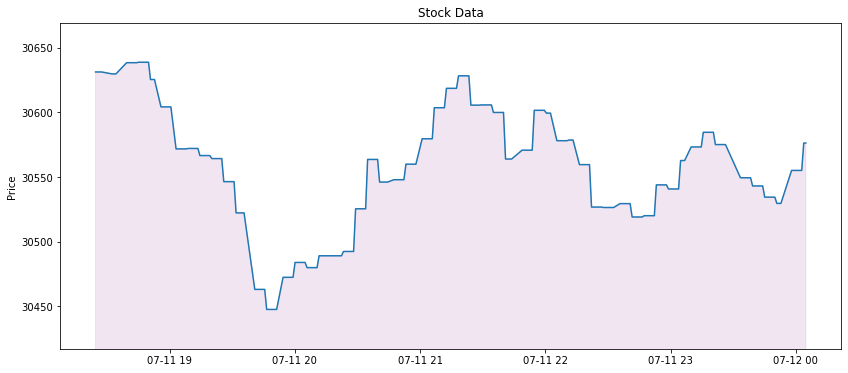

In [40]:
drawStockPrice(range(len(datedExchangeData)))

<h2>3.2 Horizontal Bars Plot</h2>

The function drawHorizontalBars() will be used to plot horizontal bars, for sentiment ratio of articles and for market depth buy vs sell order pressure, it's been coded in way so that it allows dinamically diffrent number of horizontal plots at the same time.

In [41]:
def drawHorizontalBars(dataIn, barCount):
    
    label, ratio, greenAnnotation, redAnnotation = dataIn
    
    # I was forced to write the dataFrame like this as it was the only way to get cmap to provide me red and green bars
    ratioValues = {'        ': [0], 
                    '       ': [0],
                     '      ': ratio, # <------------- Green Bar Ratios
                      '     ': [1 - x for x in ratio], # Red Bar Ratios
                       '    ': [0],
                        '   ': [0],
                         '  ': [0],
                          ' ': [0],
                           '': [0]}
    # Plot horizontal bar, checks also if single bar or multiple bar plot
    size = (14, 8) if barCount > 1 else (10, 2)
    plt  = pd.DataFrame(ratioValues, label).plot.barh(stacked=True,
                                                      cmap='tab10', 
                                                      figsize=size)
    # Remove legend and increase Y label size 
    plt.legend('', frameon=False)
    plt.tick_params(axis='y', labelsize=22)
    
    plt.invert_yaxis()
    
    # Positions the annotation in the center of the colored bars
    for x in range(0, barCount):
        
        left,bottom,width,height = plt.patches[barCount*2+x].get_bbox().bounds
        if width > 0.2:
             plt.annotate(f'{greenAnnotation[x]}', 
                          xy=(left+width/2, bottom+height/2),
                          ha='center', 
                          va='center', 
                          fontsize=25, 
                          color='black')
             
        left,bottom,width,height = plt.patches[barCount*3+x].get_bbox().bounds
        if width > 0.2:
             plt.annotate(f'{redAnnotation[x]}',  
                          xy=(left+width/2, bottom+height/2), 
                          ha='center', 
                          va='center', 
                          fontsize=25, 
                          color='black')

<h3>3.2.1 Single Bar Plot</h3>

Used to visualise current total market depth, so Buy vs Sell orders, the ratio value was calculated using calculateTotalDepthRatio().

To avoid duplicate code when trying to get different instances of exchange data, we need to encapsulate it into the function totalDepthBar()

07/11/2023, 18:24:33


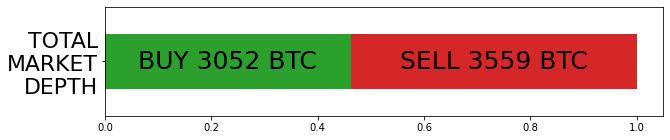

In [42]:
def totalDepthBar(entryIndex):   
    print(datedExchangeData.iloc[entryIndex][2].strftime("%m/%d/%Y, %H:%M:%S")) # TIME
    # dataIn variable stores the BUY and SELL amounts of BTC
    dataIn = calculateTotalDepthRatio(entryIndex)
    drawHorizontalBars([['TOTAL\nMARKET\nDEPTH'], 
                        [datedExchangeData.iloc[entryIndex][1]], # DRAWS MARKET DEPTH RATIO
                        [ f'BUY {dataIn[0]} BTC'], 
                        [f'SELL {dataIn[1]} BTC']], 1)
    
totalDepthBar(0)

Also this single bar will be used for visualising article sentiment:

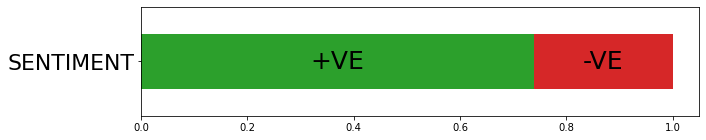

In [43]:
drawHorizontalBars([['SENTIMENT'],
                    [articles['Sentiment ratio'].values[0]], # DRAWS ARTICLE SENTIMENT RATIO
                    ['+VE'],
                    ['-VE']],1)

<h3>3.2.2 Multiple Bar Plot</h3>

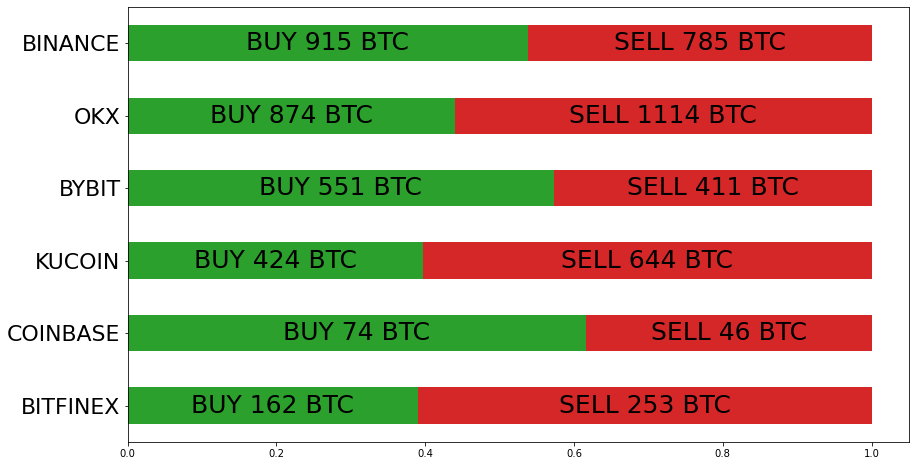

In [44]:
processedData = multipleDepthDataManager(datedExchangeData.iloc[-1][0].iloc)

drawHorizontalBars(processedData, len(processedData[0]))

<h2>3.3 Market Depth Over Time Plot</h2>

This plots a graph which shows the total market depth over time, in other words the change of buy orders vs sell orders, this allows us to see if the price of BTC is likely to go up or down. 

It uses datedExchangeData's ratio value calculated from calculateTotalDepthRatio() and the timestamp associated.

In [45]:
def drawDepthPlot():    
    
    # Disables depreciation warnings
    warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation) 
    
    data  = datedExchangeData
    time  = [x for x in data['DATE'].values]
    price = [x for x in data['TOTAL DEPTH RATIO'].values]

    # Plotting the data
    plt.figure(figsize=(14,6))
    plt.rc('font', size=14)
    
    plt.plot(time[500:], price[500:])
    plt.fill_between(time, price, color='green', alpha=1)

    # Center line
    plt.axhline(y = 0.5, color = 'black', linestyle = '-', lw=0.5) 
    
    plt.xlim(time[0], time[-1])
    plt.ylim(0, 1)
    
    plt.axes().set_facecolor("red")
    
    plt.title('MARKET DEPTH OVER TIME')
    plt.ylabel('BUY'+16*' '+'vs.'+16*' '+'SELL')
    
    plt.show()

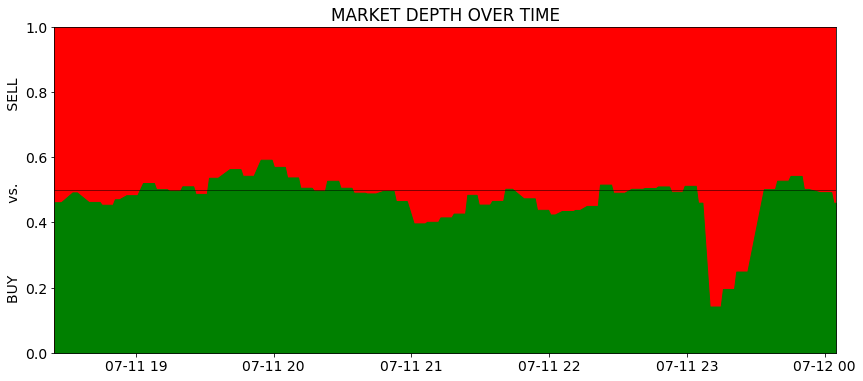

In [46]:
drawDepthPlot()

<h2>3.4 Exchange Volume Over Time Plot</h2>

Draws volume of the top 6 exchanges by volume, it allows to see which exchange is having the most trading activity and if there is any increased or decreased volume overall which could indicate a upcoming change in BTC price.

In [47]:
def drawExchangeVolume():
    
    # Creates a list of all volume data that will allow stacked graph plotting
    datedVolume = []
    for x in range(len(datedExchangeData)):
        
        data   = datedExchangeData.iloc[x]
        volume = []
        for y in range(0,6):
            
            if y > 0: 
                volume.append(data[0]['VOLUME'].values[y] + volume[y-1])
            else:
                volume.append(data[0]['VOLUME'].values[y])

        volume.reverse()
        datedVolume.append([data[2], volume])

    # Plots each volume area on top of each other, with the biggest area at the bottom.
    plt.figure(figsize=(15,6))
    for y in range(0,6):
        
        dates  = [x[0]    for x in datedVolume]
        prices = [x[1][y] for x in datedVolume]
        
        plt.ylim(0, datedVolume[-1][1][0]*1.9)
        plt.stackplot(dates, prices, lw=0.5, edgecolor='white');

    plt.title('LAST 24H EXCHANGE VOLUME')
    plt.legend(datedExchangeData.iloc[-1][0][:6]['EXCHANGE'].values[::-1])
    plt.show()

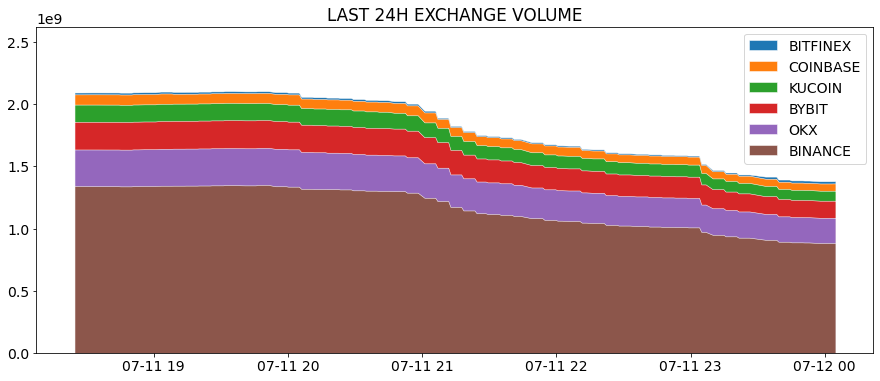

In [48]:
drawExchangeVolume()

Indeed, as previously mentioned, it becomes apparent that the traded volume of the exchanges beyond the top six is relatively insignificant in comparison. Therefore, there is no necessity to consider additional exchanges in our analysis, as their impact on the market is minimal and their contribution is barely noticeable. By focusing solely on the top six exchanges, we can maintain a comprehensive understanding of the market dynamics without introducing irrelevant information from less influential exchanges.

<h2>3.5 Bull vs. Bear Keyword Count Graph Plot</h2>

Draws a simple Bull vs Bear keyword count graph using data obtained with bullBearCounters(), this can be used for a single article counts or all articles combined counts.

In [49]:
def drawBullBearCounters(bullCounter,bearCounter): 
    
    # Data
    x = ['BULL', 'BEAR']
    y = [int(bullCounter), int(bearCounter)]

    # Bar plot
    fig, ax = plt.subplots()
    ax.bar(x = x, height = y, color=['green', 'red'])

    plt.yticks(y, [int(i) for i in y])
    plt.title('KEYWORD COUNT', fontsize = 22)
    
    plt.show()

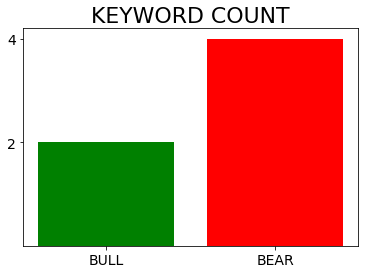

In [50]:
drawBullBearCounters(articles.iloc[0][4], articles.iloc[0][5])

<h2>3.6 Word Frequency Plot</h2>

Allows to inspect most common words and how common are against other words, also allows for fast understanding of the topic of the article or all articles together.

In [51]:
def drawMostFrequent(wordFrequencyList):    
    
    word  = [data[0].upper() for data in wordFrequencyList]
    count =    [str(data[1]) for data in wordFrequencyList]

    # Plotting the data
    plt.figure(figsize=(5,6))
    plt.plot(count, word)

    plt.gca().invert_xaxis()
    plt.gca().invert_yaxis()
    
    plt.title('WORD FREQUENCY COUNT')
    plt.xlabel('')
    plt.ylabel('')

    plt.show()

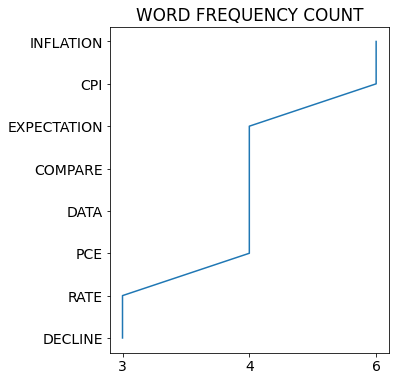

In [52]:
drawMostFrequent(articles.iloc[2][7])

<h2>3.7 Word Cloud Plot</h2>

Word Cloud proved to personally be better at conveying in a nice visual way word frequency, it achieves the same Word Frequency Plot ability to give a fast picture about the topic of the article at the expense of loosing the counters visually.

In [53]:
def drawWordCloud(wordFrequency):

    # Render WordCloud from word frequency
    plt.figure(figsize=(7,7))
    plt.imshow(WordCloud().generate_from_frequencies(wordFrequency), 
                                          interpolation='bilinear') 
    plt.axis("off")
    plt.show()

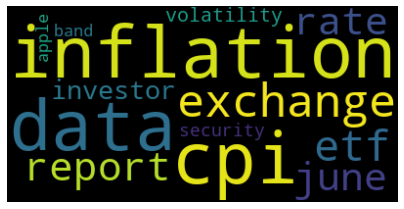

In [54]:
drawWordCloud(dict(globalWordFrequencyList))

<h1>4 - Global Data Visualisation And Analysis</h1>

Now the results of all this previous code can be seen by inputing all data from exchanges and all articles scrapped into data visualisators we created and therefore draw some analysis and conclusions: 

<h2>4.1 Technical Analysis</h2>

This is an example of how technical analysis would be made based on the 5 last hours of data scrapping from CoinMarketCap:

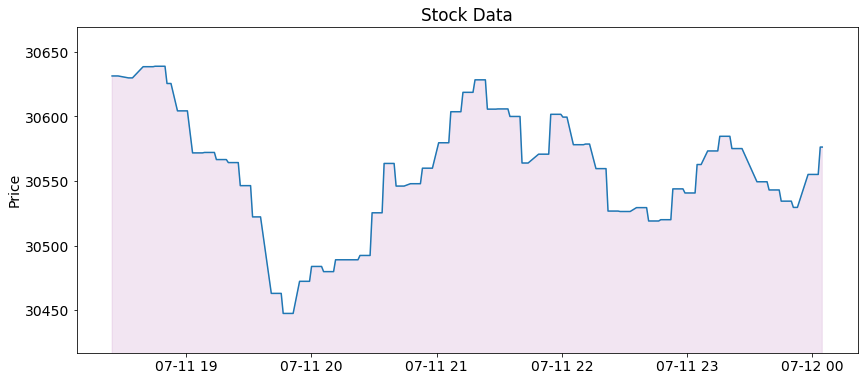

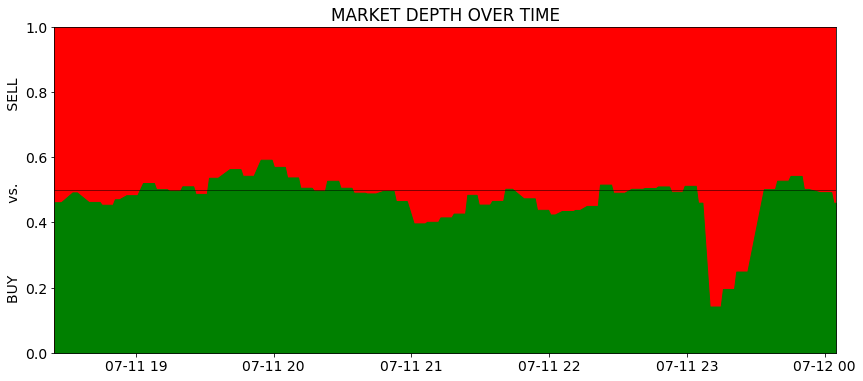

In [55]:
drawStockPrice(range(len(datedExchangeData)))
drawDepthPlot()

Upon examining both graphs concurrently, it becomes apparent that the price is undergoing consolidation as time unfolds. Notably, a discernible and robust pattern emerges when the price demonstrates upward or downward movement, leading to a market depth of 0.4 (indicating SELL pressure due to the price rising) or 0.6 (suggesting BUY pressure due to the price declining). This occurrence significantly increases the likelihood of a trend reversal in the price:

At 8 PM --> Ratio at 0.6 showed BUY pressure and afterwards a trend revearsal occured.

At 9 PM --> Ratio at 0.4 showed SELL pressure and afterwards a trend revearsal occured.

An additional noteworthy observation is the anomalous incident in the order book after 11 PM, where the market depth experienced a significant decline to approximately 0.2, indicating a substantial SELL pressure. This occurrence coincided with a momentary reversal in the price trend once again. Let's investigate who caused this.

In [56]:
datedExchangeData.sort_values(by='TOTAL DEPTH RATIO', ascending=True)[:1]

,EXCHANGE DATA,TOTAL DEPTH RATIO,DATE
258,EXCHANGE PRICE +2 SELL -2 BUY VO...,0.141909,2023-07-11 23:14:41.143598


Getting the lowest ratio value from all entries leads us to entry 253, therefore we can crosscheck with entry 252 to see the change in the order books:

07/11/2023, 23:06:43


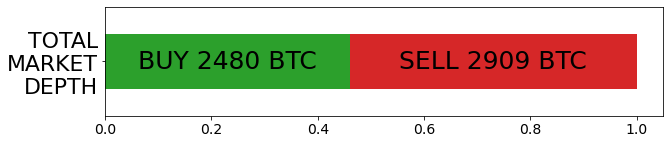

In [57]:
totalDepthBar(252)

07/11/2023, 23:09:50


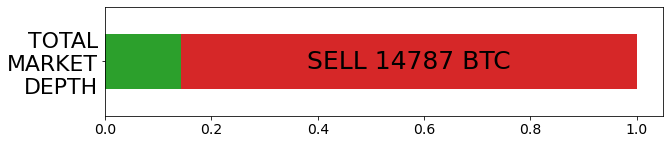

In [58]:
totalDepthBar(253)

As we can see there is a massive sell order that was created and now we shall investigate futher which exchange caused this:

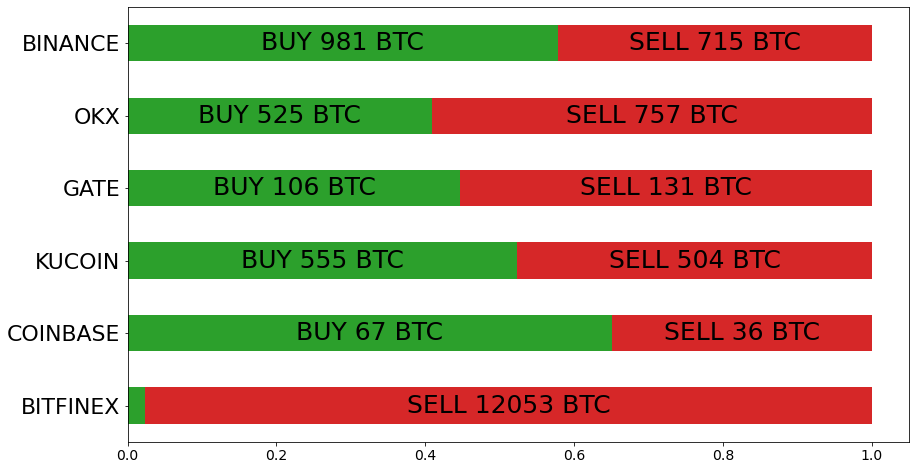

In [59]:
processedData = multipleDepthDataManager(datedExchangeData.iloc[253][0].iloc)

drawHorizontalBars(processedData, len(processedData[0]))

Looking at the graph, it's inmediately obvious that there is an absurdly big SELL order in the BITFINEX exchange. This indeed would cause other traders to panic and sell to avoid losses, this effect on itself drives the market down.

Whoever created this order, got it removed within a few minutes after the market dropped it's price, this is called spoofing and it's a form of market manipulation, as once the price has dropped sufficiently, the trader who created the order will buy at a cheaper price making a gain. This technique has been used since 1990's, a good example is the 2010 Flash Crash caused by Navinder Singh Sarao using spoofing algorithms[1].

$50 change might not seem a lot but doing some speculative calculations:

50 USD * 100 BTC (We assume the trader who spoofed the market buys this amount of BTC) = 5000 USD Profit in under 60 minutes


Let's now observe the market volume:

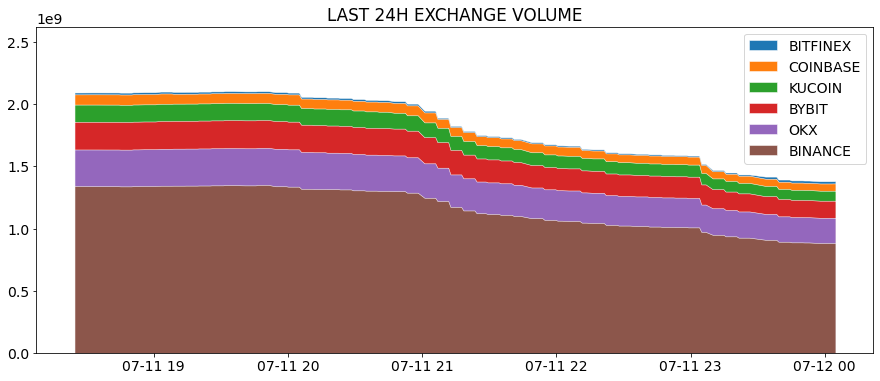

In [60]:
drawExchangeVolume()

Observing the exchanges' volume, we can see Binance has the most activity which surpasses all other exchanges combined seen here. It's pretty interesting to observe how Bitfinex being the exchange with the least volume traded from the 6 exchanges, had such a big impact on all of them when the anomaly happened.

Overall we can see traded volume was decreasing as it was approaching midninght, which is normally the least active timeframe in the markets.

<h2>4.2 Fundamental Analysis</h2>

Now we are going to analyse BTC based on the articles' scrapped data, this analysis should give us a more long term view of where the market trend might be directed by looking at the sentiment and also an eagle's view on the main keywords currently in the BTC sphere:

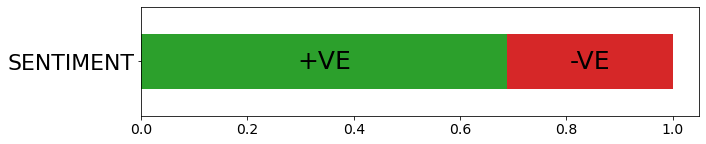

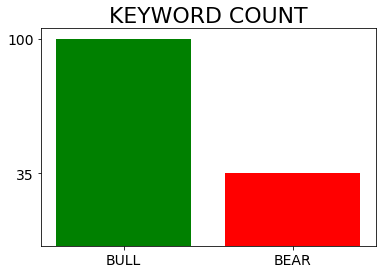

In [61]:
# Plots sentiment of all articles combined
ratio = articles['Sentiment ratio'].sum()/len(articles)

drawHorizontalBars([['SENTIMENT'],
                    [ratio],
                    ['+VE'],
                    ['-VE']],1)

# Plots Bull vs Bear counters of all articles combined
drawBullBearCounters(articles['Bull word count'].sum(), 
                     articles['Bear word count'].sum())

As we can see the sentiment seems quite positive/bullish, this would makes us be inclined into expecting the price to go up. One thing I did notice is that the sentiment analyser tends to be a bit more positive than negative, therefore I would personally offset to around 0.6 level, which would make the sentiment be just slightly positive.

We can see there is overly more bullish keywords mentioned than bearish ones, it does give us a positive future trend signal but the predicament is that the keywords are technically subject to my personal bias and normally we can have keywords to be positive or negative based on the context surrounding it and not just the keyword by itself. 

For example, the keyword 'SEC' (Securities and Exchange Commission) normally is been associated with negative news due legislation affecting negatively the crypto market, but it could be also the case where actually the SEC has approved a legislation which allows better functioning of the crypto market like for example an approval of an ETF (Exchange-traded funds) for insitutional traders to join the crypto market, which would lead to massive liquidity inflow and push the price up due higher demand, this on itself make 'SEC' a positive keyword in this context. A way to mitigate this issue would be to implement an advanced NLP AI which is able to do this.

Let's now investigate the most frequent keywords to make the big picture of what's the main topic in the BTC world:

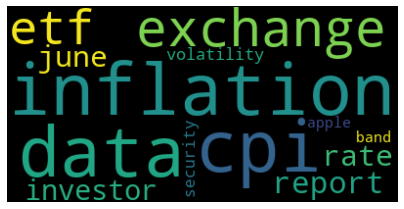

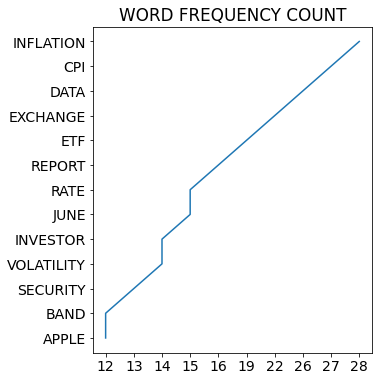

In [62]:
# Plots Word Cloud and Word Frequency of all articles combined
drawWordCloud(dict(globalWordFrequencyList))
drawMostFrequent(globalWordFrequencyList)

Based on the strong presence of keywords such as CPI, Report, Inflation, ETF, June, and Rate, it seems highly likely that the recent release of the CPI report by the FOMC has influenced the market sentiment. The frequent mention of these keywords suggests that the news has been bullish, potentially indicating a reduction in inflation for the current month.

However, it's important to note that this analysis is speculative and requires a solid understanding of the fundamental topics in financial markets. To ensure accuracy, it is advisable to crosscheck this information with reliable sources such as articles or news headlines.

Combining sentiment analysis with keyword frequency can be a valuable approach for quickly identifying current trending topics in the BTC sphere. By inputting these keywords into search engines or social media platforms, one can easily access relevant headlines and stay updated. Overall, considering the positive sentiment and keyword frequency, it indicates a possible short-term positive market trend.

<h1>5 - Data Export</h1>



<h2>5.1 Exchange Data Export and Summary of Contents</h2>

In [63]:
# Export
datedExchangeData.to_csv('datedExchangeData.csv', index = False)
# Contents
[datedExchangeData.iloc[-1][0].columns, datedExchangeData.columns[1], type(datedExchangeData.iloc[-1][2])]

[Index(['EXCHANGE', 'PRICE', '+2 SELL', '-2 BUY', 'VOLUME'], dtype='object'),
 'TOTAL DEPTH RATIO',
 datetime.datetime]

<h2>5.2 Article Data Export and Summary of Contents</h2>

In [64]:
# Export
articles.to_csv('articles.csv', index = False)
# Contents
articles.columns

Index(['Editor', 'URL', 'Raw article', 'Lemmatised article', 'Bull word count',
       'Bear word count', 'Sentiment ratio', '8 most frequent words'],
      dtype='object')

<h1>6 - Resources and references</h1>

<h2>6.1 Resources</h2>

- Pandas DataFrames Documentation   https://pandas.pydata.org/docs/reference/frame.html
- NLTK POS tagging                  https://www.nltk.org/api/nltk.tag.pos_tag.html
- Regular expression operations     https://docs.python.org/3/library/re.html

<h2>6.2 References</h2>

1. 2010 Flash Crash - Navinder Sarao https://en.wikipedia.org/wiki/2010_flash_crash